## Imports

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os

import seaborn as sns
import matplotlib.pyplot as plt
import sys

import skimage
from skimage.color import rgb2hsv
from skimage.transform import rescale, resize
from tqdm import tqdm

import sys
import os

from sklearn.metrics import classification_report


import bz2, pickle, _pickle as cPickle

import random

# random.seed(1234)

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/Modules/Testing")
import testing_module

SAVE_DIR = "../Pickled Datasets/"

COPIES = 2
N_DIGITS = 3
HEIGHT = 25
WIDTH  = 25


PLOT_SAVE = "../Plots/loss-curves/"

def compressed_pickle(name: str, data):
    with bz2.BZ2File(os.path.join(SAVE_DIR, "{}.pbz2".format(name)), 'w') as f:
        cPickle.dump(data, f)

def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data

def plot_history(history):
    acc=history.history['accuracy']
    val_acc=history.history['val_accuracy']
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    epochs=range(len(acc))

    fig, ax = plt.subplots(1, 2, figsize = (12, 6))
    ax[0].plot(epochs, acc, 'r', label = "Training Accuracy")
    ax[0].plot(epochs, val_acc, 'b', label = "Validation Accuracy")
    ax[0].legend()
    ax[0].set_title('Training and Validation Accuracy')
    ax[0].set_xlabel("Epochs")
    
    ax[1].plot(epochs, loss, 'r', label = "Training Loss")
    ax[1].plot(epochs, val_loss, 'b', label = "Validation Loss")
    ax[1].set_title('Training and Validation Losses')
    ax[1].set_xlabel("Epochs")
    plt.show()

    return (fig, ax)


SKImage rescales the image for us! Which means that we don't need to rescale by 255.0 anymore, saving us needlessly spent time and effort. There is another Augmentor library which can be used for data augmentation. We can simply sample the augmented images henceforth!

## Preliminary setup

In [11]:
sys.path.append(os.path.dirname(os.path.join((os.path.pardir), "Modules")))

origin_dir = os.path.join(os.path.pardir, 'Data')
new_dir_path = os.path.join(os.path.pardir, 'Data', 'cell_images')

#for local systems
train_csv = os.path.join(origin_dir, 'train.csv')
test_csv = os.path.join(origin_dir, 'test.csv')
val_csv = os.path.join(origin_dir, 'val.csv')

from Modules.labelling import Labelling

# download = Data_Download(origin_dir)
# data_dir = download.resize_image(new_dir_path, 44, 44)

lab = Labelling()
lab.label('../Data/cell_images/', exclude_mislabeled= True)      # function to label the dataset
train_csv, val_csv, test_csv = lab.train_test_val_split('../Data/', '../Data/cell_images/labels.csv', random_state = 1234)

In [12]:
train_data = pd.read_csv(train_csv)
val_data   = pd.read_csv(val_csv)
test_data  = pd.read_csv(test_csv)

### Reading images

In [4]:
# def read_image(path):
#     '''Function to read images given a path and return an array'''
#     return skimage.io.imread(path)

../Data/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_105102_cell_95.png
0.9966666666666667


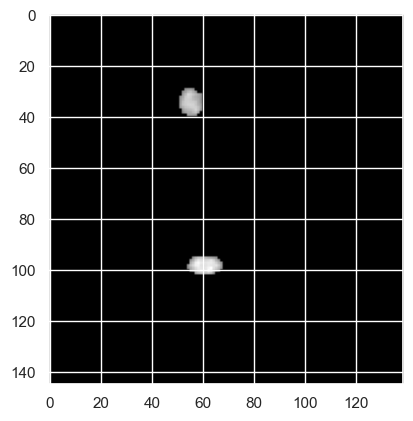

In [5]:
# i = 14

# print(train_data['Image_Path'][i])
# image = rgb2hsv(skimage.io.imread(train_data['Image_Path'][i]))
# print(np.max(image))
# result = ((image > 0.5)*image)[..., 1]
# plt.imshow(result, 'gray')

In [ ]:
# tqdm.pandas()
# train_data['image_arr'] = train_data['Image_Path'].progress_apply(lambda x: read_image(x))
# val_data['image_arr']   = val_data['Image_Path'].progress_apply(lambda x: read_image(x))
# test_data['image_arr']  = test_data['Image_Path'].progress_apply(lambda x: read_image(x))


# x_train, y_train = train_data['image_arr'].to_numpy(), train_data['Parasitized'].to_numpy()
# x_val  , y_val   = val_data['image_arr'].to_numpy()  , val_data['Parasitized'].to_numpy()
# x_test , y_test  = test_data['image_arr'].to_numpy() , test_data['Parasitized'].to_numpy()

## Data Augmentation

In [ ]:
# import albumentations as A
# import cv2

# augment = A.augmentations.geometric.transforms.Affine(
#     translate_percent = 0.1,
#     rotate = 60,
#     shear = 30
#     )

# augment = A.ShiftScaleRotate(shift_limit = 0.01, rotate_limit= 90, border_mode=cv2.BORDER_CONSTANT, always_apply= True)

# transform = A.Compose(
#     [augment,
#     A.VerticalFlip(p = 0.5),
#     A.HorizontalFlip(p = 0.5),
#     A.augmentations.geometric.Affine(shear = 10),
#     A.Resize(HEIGHT, WIDTH, always_apply= True)
#     ]
# )

# aug_dataset = []
# aug_labels = []


# for i, lab in tqdm(zip(x_train, y_train)):
#     for _ in range(COPIES):
#         aug_dataset.append(transform(image = i)['image'])
#         aug_labels.append(lab)

# x_train_aug = np.array(aug_dataset)
# y_train_aug = np.array(aug_labels)

# np.unique(y_train_aug, return_counts = True)

20601it [00:15, 1359.40it/s]


### Resizing

In [ ]:
# temp = []
# for img in tqdm(x_train):
#     temp.append(resize(img, (HEIGHT, WIDTH)))
# x_train = np.array(temp)


# temp = []
# for img in tqdm(x_val):
#     temp.append(resize(img, (HEIGHT, WIDTH)))
# x_val = np.array(temp)


# temp = []
# for img in tqdm(x_test):
#     temp.append(resize(img, (HEIGHT, WIDTH)))
# x_test = np.array(temp)

100%|██████████| 2617/2617 [00:02<00:00, 1091.63it/s]


## Saving Data

In [ ]:
# compressed_pickle("x_train_aug", x_train_aug)
# compressed_pickle("y_train_aug", y_train_aug)
# compressed_pickle("x_train", x_train)
# compressed_pickle("y_train", y_train)
# compressed_pickle("x_val", x_val)
# compressed_pickle("y_val", y_val)
# compressed_pickle("x_test", x_test)
# compressed_pickle("y_test", y_test)

## Loading Data

In [24]:
x_train_aug = decompress_pickle(SAVE_DIR + 'x_train_aug.pbz2')
y_train_aug = decompress_pickle(SAVE_DIR + 'y_train_aug.pbz2')
x_train = decompress_pickle(SAVE_DIR + 'x_train.pbz2')
y_train = decompress_pickle(SAVE_DIR + 'y_train.pbz2')
x_val = decompress_pickle(SAVE_DIR + 'x_val.pbz2')
y_val = decompress_pickle(SAVE_DIR + 'y_val.pbz2')
x_test = decompress_pickle(SAVE_DIR + 'x_test.pbz2')
y_test = decompress_pickle(SAVE_DIR + 'y_test.pbz2')

print("augmented: ", x_train_aug.shape, y_train_aug.shape)
print("train: ", x_train.shape, y_train.shape)
print("val: ", x_val.shape, y_val.shape)
print("test: ", x_test.shape, y_test.shape)

augmented:  (41202, 25, 25, 3) (41202,)
train:  (20601, 25, 25, 3) (20601,)
val:  (2943, 25, 25, 3) (2943,)
test:  (2617, 25, 25, 3) (2617,)


In [8]:
n_aug_train = x_train_aug.shape[0]
n_train     = x_train.shape[0]
n_val       = x_val.shape[0]
n_test      = x_test.shape[0]

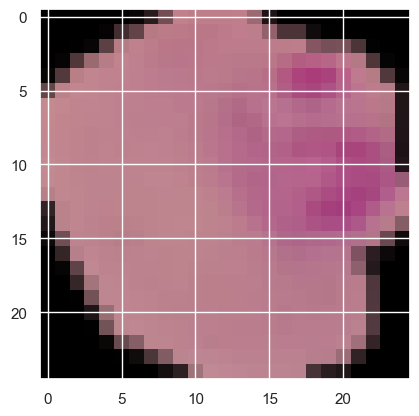

In [9]:
plt.imshow(x_train[3])

## Modeling

### Unaugmented

#### Naive Bayes

In [17]:
from sklearn import naive_bayes

nb_cls = naive_bayes.GaussianNB()
nb_cls.fit(x_train.reshape(n_train, -1), y_train)
preds_train = nb_cls.predict(x_train.reshape(n_train, -1))
preds_val   = nb_cls.predict(x_val.reshape(n_val, -1))
preds_test  = nb_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

# eval = testing_module.ModelEvaluation(y_val, 
#     nb_cls.predict(x_val.reshape(n_val, -1)),
#     model_reference_name = 'Naive Bayes',
#     model_type = 'classification',
#     plot_classification_metric = ['roc_auc']) # if classification
# eval.evaluate(evaluate_save= True, plots_show = True)

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.611     0.746     0.672     10260
         1.0      0.677     0.530     0.594     10341

    accuracy                          0.637     20601
   macro avg      0.644     0.638     0.633     20601
weighted avg      0.644     0.637     0.633     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.620     0.761     0.683      1466
         1.0      0.693     0.538     0.606      1477

    accuracy                          0.649      2943
   macro avg      0.657     0.649     0.644      2943
weighted avg      0.657     0.649     0.644      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.613     0.766     0.681      1303
         1.0      0.692     0.521     0.595      1314

    accuracy                          0.643      2617
   macro avg      0.653

#### Logistic Regression

Epoch 1/100
41/41 [==============================] - 1s 7ms/step - loss: 0.7193 - accuracy: 0.5338 - val_loss: 0.6638 - val_accuracy: 0.6120
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6599 - accuracy: 0.6088 - val_loss: 0.6445 - val_accuracy: 0.6337
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6428 - accuracy: 0.6331 - val_loss: 0.6313 - val_accuracy: 0.6402
Epoch 4/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6328 - accuracy: 0.6456 - val_loss: 0.6208 - val_accuracy: 0.6538
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6222 - accuracy: 0.6533 - val_loss: 0.6165 - val_accuracy: 0.6575
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6182 - accuracy: 0.6603 - val_loss: 0.6121 - val_accuracy: 0.6639
Epoch 7/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6136 - accuracy: 0.6662 - val_loss: 0.6066 - val_accuracy: 0.6707
Epoch 8/100
4

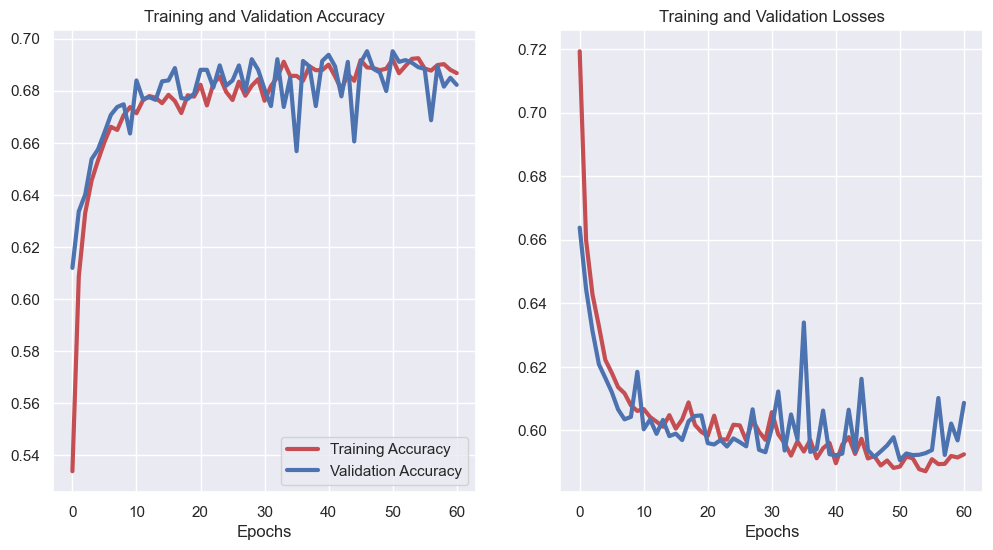

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.681     0.726     0.703     10260
         1.0      0.709     0.662     0.685     10341

    accuracy                          0.694     20601
   macro avg      0.695     0.694     0.694     20601
weighted avg      0.695     0.694     0.694     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.679     0.736     0.706      1466
         1.0      0.714     0.655     0.683      1477

    accuracy                          0.695      2943
   macro avg      0.697     0.695     0.695      2943
weighted avg      0.697     0.695     0.695      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.671     0.728     0.698      1303
         1.0      0.705     0.646     0.674      1314

    accuracy                          0.687      2617
   macro avg      0.688

In [18]:
from sklearn.linear_model import LogisticRegression

logreg_cls =  tf.keras.Sequential([tf.keras.layers.Dense(2, activation = 'sigmoid', input_dim = HEIGHT * WIDTH * 3)])
logreg_cls.compile(optimizer = tf.optimizers.Adam(0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = logreg_cls.fit(x_train.reshape(n_train, -1), 
                        y_train,
                        batch_size = 512,
                        validation_data=[x_val.reshape(n_val, -1), y_val],
                        validation_batch_size=128,
                        epochs = 100,
                        callbacks =  [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
                                     tf.keras.callbacks.ModelCheckpoint(str = 'val_loss', save_best_only = True, save_weights_only = True, filepath= "LR_No_Aug")],
                        verbose = 1)

logreg_cls.load_weights('LR_No_Aug')
preds_train = np.argmax(logreg_cls.predict(x_train.reshape(n_train, -1)), axis = 1)
preds_val   = np.argmax(logreg_cls.predict(x_val.reshape(n_val, -1)), axis = 1)
preds_test  = np.argmax(logreg_cls.predict(x_test.reshape(n_test, -1)), axis = 1)

fig, ax = plot_history(history)

fig.savefig(PLOT_SAVE + "logreg_unaug_losscurve.png", facecolor = 'white')

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

#### Decision Trees

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt_cls =  DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 5, min_samples_split = 2, )
dt_cls.fit(x_train.reshape(n_train, -1), y_train)
preds_train = dt_cls.predict(x_train.reshape(n_train, -1))
preds_val   = dt_cls.predict(x_val.reshape(n_val, -1))
preds_test  = dt_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

# eval = testing_module.ModelEvaluation(y_val, 
#     nb_cls.predict(x_val.reshape(n_val, -1)),
#     model_reference_name = 'Naive Bayes',
#     model_type = 'classification',
#     plot_classification_metric = ['roc_auc']) # if classification
# eval.evaluate(evaluate_save= True, plots_show = True)

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.685     0.774     0.727     10260
         1.0      0.743     0.646     0.691     10341

    accuracy                          0.710     20601
   macro avg      0.714     0.710     0.709     20601
weighted avg      0.714     0.710     0.709     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.676     0.774     0.722      1466
         1.0      0.738     0.632     0.681      1477

    accuracy                          0.703      2943
   macro avg      0.707     0.703     0.701      2943
weighted avg      0.707     0.703     0.701      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.662     0.748     0.702      1303
         1.0      0.713     0.621     0.664      1314

    accuracy                          0.684      2617
   macro avg      0.688

#### XGBoost

In [20]:
from xgboost import XGBClassifier

xgb_cls = XGBClassifier(max_depth = 5, objective = 'reg:logistic',
                            num_parallel_tree = 20, booster = 'gbtree',
                            gamma = 0.5, tree_method = 'gpu_hist', subsample = 0.4, reg_lambda = 1)
xgb_cls.fit(x_train.reshape(n_train, -1), y_train)
preds_train = xgb_cls.predict(x_train.reshape(n_train, -1))
preds_val   = xgb_cls.predict(x_val.reshape(n_val, -1))
preds_test  = xgb_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))
                  

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.966     0.983     0.974     10260
         1.0      0.983     0.966     0.974     10341

    accuracy                          0.974     20601
   macro avg      0.974     0.974     0.974     20601
weighted avg      0.975     0.974     0.974     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.842     0.873     0.857      1466
         1.0      0.869     0.837     0.853      1477

    accuracy                          0.855      2943
   macro avg      0.855     0.855     0.855      2943
weighted avg      0.855     0.855     0.855      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.842     0.861     0.851      1303
         1.0      0.859     0.839     0.849      1314

    accuracy                          0.850      2617
   macro avg      0.850

#### SVM

In [21]:
from sklearn.svm import SVC

svm_cls = SVC(kernel = 'poly', degree = 3, gamma = 'auto', max_iter = 250, verbose= True)
svm_cls.fit(x_train.reshape(n_train, -1), y_train)
preds_train = svm_cls.predict(x_train.reshape(n_train, -1))
preds_val   = svm_cls.predict(x_val.reshape(n_val, -1))
preds_test  = svm_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))
                  

[LibSVM]

c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.581     0.102     0.174     10260
         1.0      0.510     0.927     0.658     10341

    accuracy                          0.516     20601
   macro avg      0.545     0.515     0.416     20601
weighted avg      0.545     0.516     0.417     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.585     0.101     0.172      1466
         1.0      0.510     0.929     0.659      1477

    accuracy                          0.516      2943
   macro avg      0.548     0.515     0.415      2943
weighted avg      0.547     0.516     0.416      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.590     0.106     0.180      1303
         1.0      0.511     0.927     0.659      1314

    accuracy                          0.518      2617
   macro avg      0.550

#### Transfer Learning

Epoch 1/50
322/322 [==============================] - 9s 19ms/step - loss: 0.2106 - accuracy: 0.9199 - val_loss: 0.1661 - val_accuracy: 0.9354
Epoch 2/50
322/322 [==============================] - 5s 17ms/step - loss: 0.1250 - accuracy: 0.9508 - val_loss: 0.1198 - val_accuracy: 0.9548
Epoch 3/50
322/322 [==============================] - 5s 16ms/step - loss: 0.1112 - accuracy: 0.9557 - val_loss: 0.1237 - val_accuracy: 0.9501
Epoch 4/50
322/322 [==============================] - 5s 16ms/step - loss: 0.1035 - accuracy: 0.9585 - val_loss: 0.1358 - val_accuracy: 0.9470
Epoch 5/50
322/322 [==============================] - 5s 16ms/step - loss: 0.0911 - accuracy: 0.9650 - val_loss: 0.1136 - val_accuracy: 0.9623
Epoch 6/50
322/322 [==============================] - 5s 16ms/step - loss: 0.0853 - accuracy: 0.9666 - val_loss: 0.1162 - val_accuracy: 0.9623
Epoch 7/50
322/322 [==============================] - 5s 16ms/step - loss: 0.0829 - accuracy: 0.9683 - val_loss: 0.1133 - val_accuracy: 0.9592

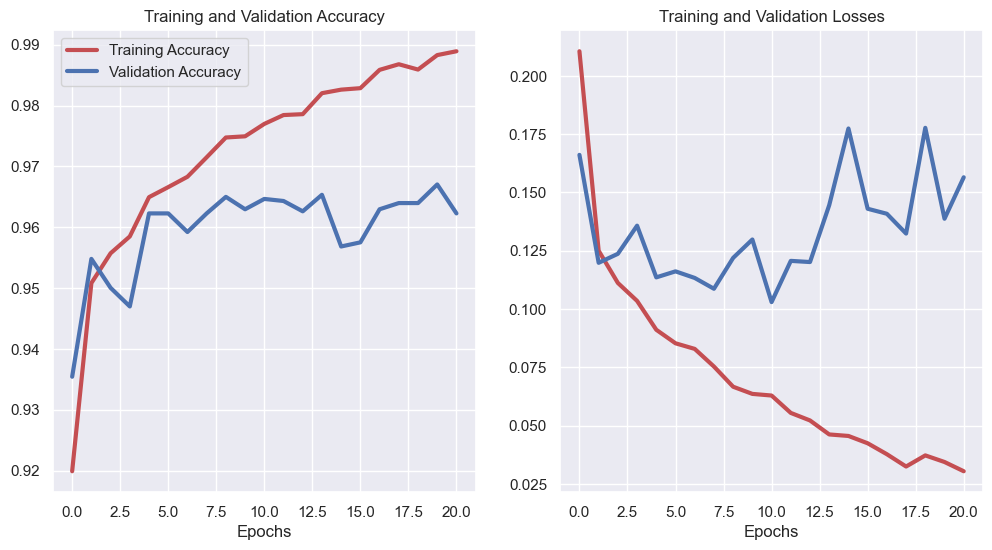

82/82 [==============================] - 1s 7ms/step
Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.974     0.990     0.982     10260
         1.0      0.990     0.974     0.982     10341

    accuracy                          0.982     20601
   macro avg      0.982     0.982     0.982     20601
weighted avg      0.982     0.982     0.982     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.958     0.972     0.965      1466
         1.0      0.972     0.957     0.965      1477

    accuracy                          0.965      2943
   macro avg      0.965     0.965     0.965      2943
weighted avg      0.965     0.965     0.965      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.953     0.969     0.961      1303
         1.0      0.968     0.953     0.960      1314

    accuracy            

In [22]:
imagenet = tf.keras.applications.Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = (72, 72, 3)
)
imagenet.trainable = False

trans_learn = tf.keras.Sequential([
    tf.keras.layers.Resizing(72, 72),
    imagenet,

    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'sigmoid')
])

trans_learn.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.003),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = trans_learn.fit(
            x_train, y_train, batch_size = 64,
            shuffle = True,
            epochs = 50,
            validation_data = [x_val, y_val],
            validation_batch_size = 32,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
                        tf.keras.callbacks.ModelCheckpoint(str = 'val_loss', save_best_only = True, save_weights_only = True, filepath= "TL_No_Aug")]
        )
fig, ax = plot_history(history)

trans_learn.load_weights('TL_No_Aug')

fig.savefig(PLOT_SAVE + "TL_unaug_losscurve.png", facecolor = 'white')
preds_train = np.argmax(trans_learn.predict(x_train), axis = 1)
preds_val   = np.argmax(trans_learn.predict(x_val), axis = 1)
preds_test  = np.argmax(trans_learn.predict(x_test), axis = 1)

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))



#### CNN Model

Epoch 1/50
21/21 [==============================] - 1s 17ms/step - loss: 0.6751 - accuracy: 0.5819 - val_loss: 0.6595 - val_accuracy: 0.6344
Epoch 2/50
21/21 [==============================] - 0s 9ms/step - loss: 0.6202 - accuracy: 0.6601 - val_loss: 0.5454 - val_accuracy: 0.7353
Epoch 3/50
21/21 [==============================] - 0s 9ms/step - loss: 0.5247 - accuracy: 0.7444 - val_loss: 0.4280 - val_accuracy: 0.8233
Epoch 4/50
21/21 [==============================] - 0s 7ms/step - loss: 0.4279 - accuracy: 0.8085 - val_loss: 0.4527 - val_accuracy: 0.7808
Epoch 5/50
21/21 [==============================] - 0s 9ms/step - loss: 0.3721 - accuracy: 0.8391 - val_loss: 0.2821 - val_accuracy: 0.8821
Epoch 6/50
21/21 [==============================] - 0s 9ms/step - loss: 0.2998 - accuracy: 0.8746 - val_loss: 0.2189 - val_accuracy: 0.9164
Epoch 7/50
21/21 [==============================] - 0s 9ms/step - loss: 0.2105 - accuracy: 0.9218 - val_loss: 0.1478 - val_accuracy: 0.9392
Epoch 8/50
21/21 [=

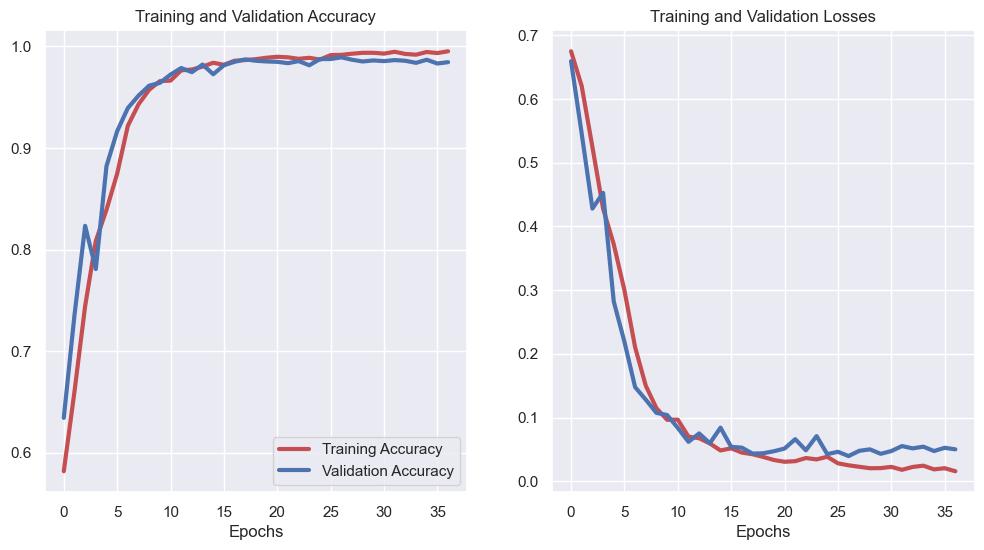

82/82 [==============================] - 0s 1ms/step
Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.993     0.997     0.995     10260
         1.0      0.997     0.993     0.995     10341

    accuracy                          0.995     20601
   macro avg      0.995     0.995     0.995     20601
weighted avg      0.995     0.995     0.995     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.986     0.992     0.989      1466
         1.0      0.993     0.986     0.989      1477

    accuracy                          0.989      2943
   macro avg      0.989     0.989     0.989      2943
weighted avg      0.989     0.989     0.989      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.976     0.995     0.985      1303
         1.0      0.995     0.976     0.985      1314

    accuracy            

In [23]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), padding = 'same', activation = 'relu', input_shape = x_train[0].shape),
    tf.keras.layers.MaxPool2D((3,3), padding = 'same'),

    tf.keras.layers.Conv2D(32, (2,2), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D((2,2), padding = 'same'),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation = 'sigmoid')
])

cnn.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.003),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = cnn.fit(
            x_train, y_train, batch_size = 1024,
            epochs = 50,
            validation_data = [x_val, y_val],
            validation_batch_size = 256,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
                         tf.keras.callbacks.ModelCheckpoint(str = 'val_loss', save_best_only = True, save_weights_only = True, filepath= "CNN_No_Aug")]
        )


cnn.load_weights('CNN_No_Aug')
fig, ax = plot_history(history)

fig.savefig(PLOT_SAVE + "CNN_unaug_losscurve.png", facecolor = 'white')
preds_train = np.argmax(cnn.predict(x_train), axis = 1)
preds_val   = np.argmax(cnn.predict(x_val), axis = 1)
preds_test  = np.argmax(cnn.predict(x_test), axis = 1)

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

### Augmented Dataset

#### Naive Bayes

In [24]:
from sklearn import naive_bayes

nb_cls = naive_bayes.GaussianNB()
nb_cls.fit(x_train_aug.reshape(n_aug_train, -1), y_train_aug)
preds_train = nb_cls.predict(x_train_aug.reshape(n_aug_train, -1))
preds_val   = nb_cls.predict(x_val.reshape(n_val, -1))
preds_test  = nb_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train_aug, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.612     0.754     0.676     20520
         1.0      0.683     0.526     0.594     20682

    accuracy                          0.640     41202
   macro avg      0.648     0.640     0.635     41202
weighted avg      0.648     0.640     0.635     41202


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.000     0.000     0.000      1466
         1.0      0.502     1.000     0.668      1477

    accuracy                          0.502      2943
   macro avg      0.251     0.500     0.334      2943
weighted avg      0.252     0.502     0.335      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.000     0.000     0.000      1303
         1.0      0.502     1.000     0.669      1314

    accuracy                          0.502      2617
   macro avg      0.251

c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\m

#### Logistic Regression

Epoch 1/100
81/81 [==============================] - 0s 4ms/step - loss: 27.6651 - accuracy: 0.5405 - val_loss: 0.6819 - val_accuracy: 0.5433
Epoch 2/100
81/81 [==============================] - 0s 3ms/step - loss: 13.2831 - accuracy: 0.5655 - val_loss: 0.6789 - val_accuracy: 0.6347
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 13.6490 - accuracy: 0.5627 - val_loss: 0.6784 - val_accuracy: 0.5542
Epoch 4/100
81/81 [==============================] - 0s 2ms/step - loss: 11.6192 - accuracy: 0.5803 - val_loss: 0.6815 - val_accuracy: 0.6334
Epoch 5/100
81/81 [==============================] - 0s 2ms/step - loss: 11.2362 - accuracy: 0.5711 - val_loss: 0.6820 - val_accuracy: 0.5328
Epoch 6/100
81/81 [==============================] - 0s 2ms/step - loss: 12.7588 - accuracy: 0.5656 - val_loss: 0.6815 - val_accuracy: 0.5199
Epoch 7/100
81/81 [==============================] - 0s 2ms/step - loss: 9.1463 - accuracy: 0.5923 - val_loss: 0.6806 - val_accuracy: 0.6069
Epoch 8

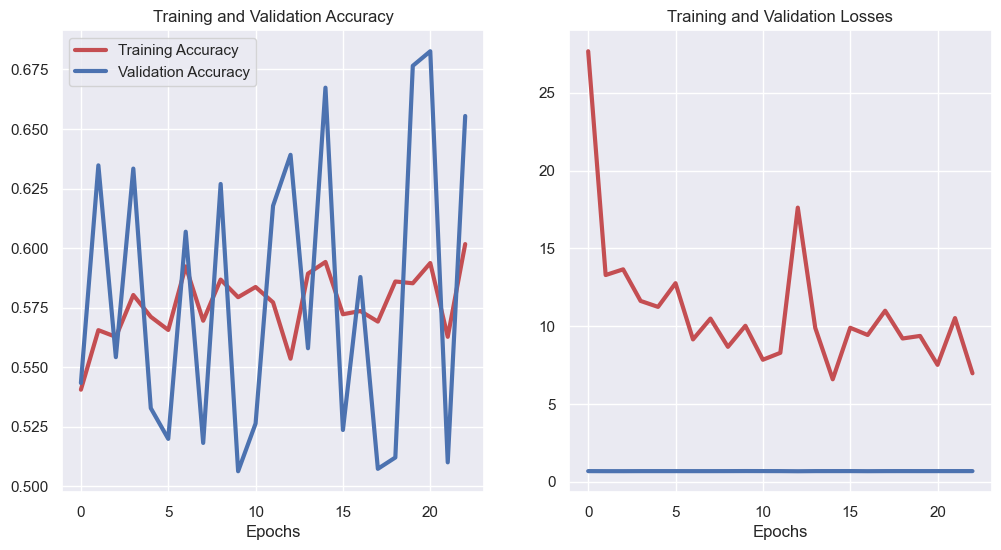

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.498     1.000     0.665     20520
         1.0      0.000     0.000     0.000     20682

    accuracy                          0.498     41202
   macro avg      0.249     0.500     0.332     41202
weighted avg      0.248     0.498     0.331     41202


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.607     0.875     0.717      1466
         1.0      0.779     0.437     0.560      1477

    accuracy                          0.655      2943
   macro avg      0.693     0.656     0.639      2943
weighted avg      0.693     0.655     0.638      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.599     0.859     0.706      1303
         1.0      0.754     0.429     0.547      1314

    accuracy                          0.643      2617
   macro avg      0.676

c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.linear_model import LogisticRegression

logreg_cls =  tf.keras.Sequential([tf.keras.layers.Dense(2, activation = 'sigmoid', input_dim = HEIGHT * WIDTH * 3)])
logreg_cls.compile(optimizer = tf.optimizers.Adam(0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = logreg_cls.fit(x_train_aug.reshape(n_aug_train, -1), 
                        y_train_aug,
                        batch_size = 512,
                        validation_data=[x_val.reshape(n_val, -1), y_val],
                        validation_batch_size=128,
                        epochs = 100,
                        callbacks =  [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
                                    tf.keras.callbacks.ModelCheckpoint(str = 'val_loss', save_best_only = True, save_weights_only = True, filepath= "LR_Aug")])
preds_train = np.argmax(logreg_cls.predict(x_train_aug.reshape(n_aug_train, -1)), axis = 1)
preds_val   = np.argmax(logreg_cls.predict(x_val.reshape(n_val, -1)), axis = 1)
preds_test  = np.argmax(logreg_cls.predict(x_test.reshape(n_test, -1)), axis = 1)

logreg_cls.load_weights('LR_Aug')
fig, ax = plot_history(history)

fig.savefig(PLOT_SAVE + "logreg_aug_losscurve.png", facecolor = 'white')

print("Training Classification Report: \n", classification_report(y_train_aug, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

#### Decision Trees

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt_cls =  DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 20, min_samples_split = 2, )
dt_cls.fit(x_train_aug.reshape(n_aug_train, -1), y_train_aug)
preds_train = dt_cls.predict(x_train_aug.reshape(n_aug_train, -1))
preds_val   = dt_cls.predict(x_val.reshape(n_val, -1))
preds_test  = dt_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train_aug, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

# eval = testing_module.ModelEvaluation(y_val, 
#     nb_cls.predict(x_val.reshape(n_val, -1)),
#     model_reference_name = 'Naive Bayes',
#     model_type = 'classification',
#     plot_classification_metric = ['roc_auc']) # if classification
# eval.evaluate(evaluate_save= True, plots_show = True)

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.823     0.992     0.900     20520
         1.0      0.989     0.789     0.878     20682

    accuracy                          0.890     41202
   macro avg      0.906     0.890     0.889     41202
weighted avg      0.907     0.890     0.889     41202


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.498     1.000     0.665      1466
         1.0      0.000     0.000     0.000      1477

    accuracy                          0.498      2943
   macro avg      0.249     0.500     0.333      2943
weighted avg      0.248     0.498     0.331      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.498     1.000     0.665      1303
         1.0      0.000     0.000     0.000      1314

    accuracy                          0.498      2617
   macro avg      0.249

c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\m

#### XGBoost

In [27]:
from xgboost import XGBClassifier

xgb_cls = XGBClassifier(max_depth = 5, objective = 'reg:logistic',
                            num_parallel_tree = 20, booster = 'gbtree',
                            gamma = 0.5, tree_method = 'gpu_hist', subsample = 0.4, reg_lambda = 1)
xgb_cls.fit(x_train_aug.reshape(n_aug_train, -1), y_train_aug)
preds_train = xgb_cls.predict(x_train_aug.reshape(n_aug_train, -1))
preds_val   = xgb_cls.predict(x_val.reshape(n_val, -1))
preds_test  = xgb_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train_aug, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))
                  

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.898     0.951     0.923     20520
         1.0      0.948     0.892     0.919     20682

    accuracy                          0.921     41202
   macro avg      0.923     0.921     0.921     41202
weighted avg      0.923     0.921     0.921     41202


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.498     1.000     0.665      1466
         1.0      0.000     0.000     0.000      1477

    accuracy                          0.498      2943
   macro avg      0.249     0.500     0.333      2943
weighted avg      0.248     0.498     0.331      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.498     1.000     0.665      1303
         1.0      0.000     0.000     0.000      1314

    accuracy                          0.498      2617
   macro avg      0.249

c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\m

#### SVM

In [28]:
from sklearn.svm import SVC

svm_cls = SVC(kernel = 'rbf', max_iter = 250, verbose= True)
svm_cls.fit(x_train_aug.reshape(n_aug_train, -1), y_train_aug)
preds_train = svm_cls.predict(x_train_aug.reshape(n_aug_train, -1))
preds_val   = svm_cls.predict(x_val.reshape(n_val, -1))
preds_test  = svm_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train_aug, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))
                  

[LibSVM]

c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.495     0.207     0.292     20520
         1.0      0.501     0.791     0.613     20682

    accuracy                          0.500     41202
   macro avg      0.498     0.499     0.452     41202
weighted avg      0.498     0.500     0.453     41202


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.498     1.000     0.665      1466
         1.0      0.000     0.000     0.000      1477

    accuracy                          0.498      2943
   macro avg      0.249     0.500     0.333      2943
weighted avg      0.248     0.498     0.331      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.498     1.000     0.665      1303
         1.0      0.000     0.000     0.000      1314

    accuracy                          0.498      2617
   macro avg      0.249

c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\m

#### Transfer Learning

Epoch 1/50
322/322 [==============================] - 11s 28ms/step - loss: 1.5221 - accuracy: 0.6764 - val_loss: 0.6932 - val_accuracy: 0.5019
Epoch 2/50
322/322 [==============================] - 8s 26ms/step - loss: 0.5602 - accuracy: 0.7419 - val_loss: 0.6932 - val_accuracy: 0.5019
Epoch 3/50
322/322 [==============================] - 9s 27ms/step - loss: 0.5131 - accuracy: 0.7580 - val_loss: 0.6934 - val_accuracy: 0.5019
Epoch 4/50
322/322 [==============================] - 9s 27ms/step - loss: 0.5048 - accuracy: 0.7614 - val_loss: 0.6935 - val_accuracy: 0.5019
Epoch 5/50
322/322 [==============================] - 9s 27ms/step - loss: 0.4963 - accuracy: 0.7633 - val_loss: 0.6937 - val_accuracy: 0.5019
Epoch 6/50
322/322 [==============================] - 9s 27ms/step - loss: 0.4653 - accuracy: 0.7765 - val_loss: 0.6940 - val_accuracy: 0.5019
Epoch 7/50
322/322 [==============================] - 9s 27ms/step - loss: 0.4615 - accuracy: 0.7800 - val_loss: 0.6943 - val_accuracy: 0.501

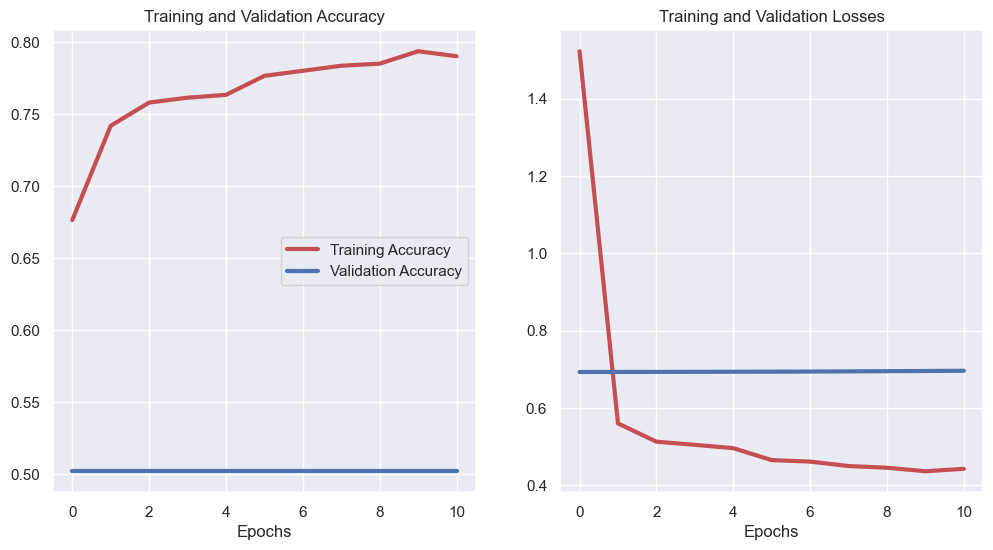

82/82 [==============================] - 1s 7ms/step
Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.634     0.952     0.761     20520
         1.0      0.906     0.455     0.606     20682

    accuracy                          0.703     41202
   macro avg      0.770     0.704     0.684     41202
weighted avg      0.771     0.703     0.683     41202


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.000     0.000     0.000      1466
         1.0      0.502     1.000     0.668      1477

    accuracy                          0.502      2943
   macro avg      0.251     0.500     0.334      2943
weighted avg      0.252     0.502     0.335      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.000     0.000     0.000      1303
         1.0      0.502     1.000     0.669      1314

    accuracy            

c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\m

In [34]:
imagenet = tf.keras.applications.Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = (72, 72, 3)
)
imagenet.trainable = False

trans_learn = tf.keras.Sequential([
    tf.keras.layers.Resizing(72, 72),
    imagenet,

    tf.keras.layers.GlobalAveragePooling2D(),
    #tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'sigmoid')
])

trans_learn.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = trans_learn.fit(
            x_train_aug, y_train_aug, batch_size = 128,
            shuffle = True,
            epochs = 50,
            validation_data = [x_val, y_val],
            validation_batch_size = 64,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
                        tf.keras.callbacks.ModelCheckpoint(str = 'val_loss', save_best_only = True, save_weights_only = True, filepath= "TL_Aug")]
        )

trans_learn.load_weights('TL_Aug')

fig, ax = plot_history(history)

fig.savefig(PLOT_SAVE + "TL_aug_losscurve.png", facecolor = 'white')
preds_train = np.argmax(trans_learn.predict(x_train_aug), axis = 1)
preds_val   = np.argmax(trans_learn.predict(x_val), axis = 1)
preds_test  = np.argmax(trans_learn.predict(x_test), axis = 1)

print("Training Classification Report: \n", classification_report(y_train_aug, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))



#### CNN Model

Epoch 1/50
161/161 [==============================] - 6s 29ms/step - loss: 0.4880 - accuracy: 0.7363 - val_loss: 0.0826 - val_accuracy: 0.9694
Epoch 2/50
161/161 [==============================] - 4s 24ms/step - loss: 0.1094 - accuracy: 0.9631 - val_loss: 0.0499 - val_accuracy: 0.9844
Epoch 3/50
161/161 [==============================] - 4s 23ms/step - loss: 0.0655 - accuracy: 0.9790 - val_loss: 0.0526 - val_accuracy: 0.9837
Epoch 4/50
161/161 [==============================] - 4s 24ms/step - loss: 0.0560 - accuracy: 0.9826 - val_loss: 0.0472 - val_accuracy: 0.9827
Epoch 5/50
161/161 [==============================] - 4s 23ms/step - loss: 0.0474 - accuracy: 0.9857 - val_loss: 0.0698 - val_accuracy: 0.9742
Epoch 6/50
161/161 [==============================] - 4s 24ms/step - loss: 0.0440 - accuracy: 0.9865 - val_loss: 0.0423 - val_accuracy: 0.9864
Epoch 7/50
161/161 [==============================] - 4s 24ms/step - loss: 0.0403 - accuracy: 0.9882 - val_loss: 0.0340 - val_accuracy: 0.9888

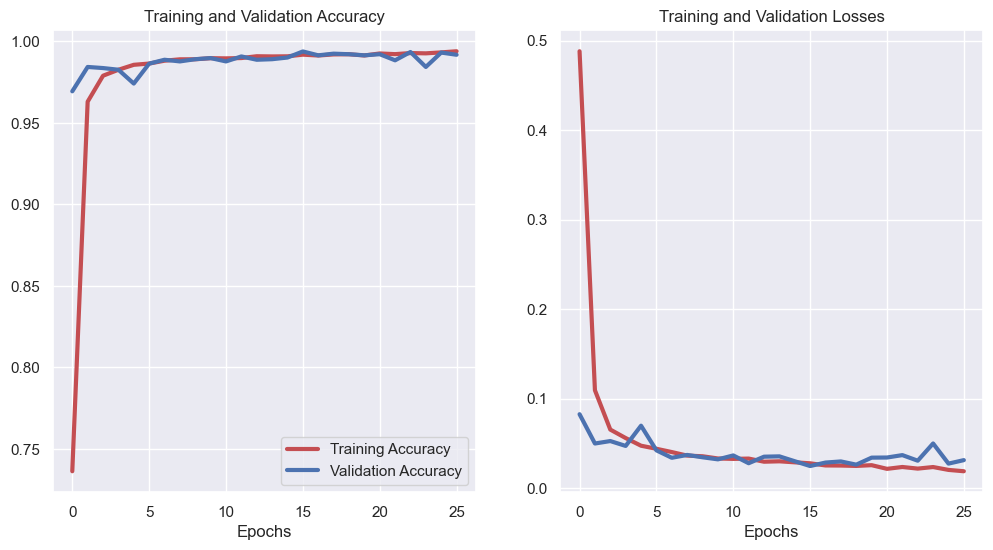

82/82 [==============================] - 0s 2ms/step
Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.985     0.997     0.991     20520
         1.0      0.997     0.985     0.991     20682

    accuracy                          0.991     41202
   macro avg      0.991     0.991     0.991     41202
weighted avg      0.991     0.991     0.991     41202


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.994     0.994     0.994      1466
         1.0      0.994     0.994     0.994      1477

    accuracy                          0.994      2943
   macro avg      0.994     0.994     0.994      2943
weighted avg      0.994     0.994     0.994      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.991     0.995     0.993      1303
         1.0      0.995     0.991     0.993      1314

    accuracy            

In [ ]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape = x_train_aug[0].shape),
    tf.keras.layers.MaxPool2D((3,3), padding = 'same'),

    tf.keras.layers.UpSampling2D((5,5)),

    tf.keras.layers.Conv2D(64, (4,4), padding = 'same', activation = 'relu', input_shape = x_train_aug[0].shape),
    tf.keras.layers.MaxPool2D((4,4), padding = 'same'),

    tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D((3,3), padding = 'same'),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation = 'sigmoid')
])

cnn.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = cnn.fit(
            x_train_aug, y_train_aug, batch_size = 256,
            epochs = 50,
            shuffle = True,
            validation_data = [x_val, y_val],
            validation_batch_size = 128,
            callbacks = [
                tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
                tf.keras.callbacks.ModelCheckpoint(str = 'val_loss', save_best_only = True, save_weights_only = True, filepath= "CNN_Aug")
            ]
        )

fig, ax = plot_history(history)

cnn.load_weights('CNN_Aug')

fig.savefig(PLOT_SAVE + "CNN_aug_losscurve.png", facecolor = 'white')
preds_train = np.argmax(cnn.predict(x_train_aug), axis = 1)
preds_val   = np.argmax(cnn.predict(x_val), axis = 1)
preds_test  = np.argmax(cnn.predict(x_test), axis = 1)

print("Training Classification Report: \n", classification_report(y_train_aug, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

## HSV Modelling with only the saturation dimension

Transfer learning does not work since it requires exactly 3 input channels (Xception, VGG19, etc)

### Preparing Datasets

In [25]:
temp = []
for img in tqdm(x_train):
    temp.append(rgb2hsv(img))
temp = np.array(temp)[..., 1]
x_train = temp
x_train = x_train[..., np.newaxis]

temp = []
for img in tqdm(x_val):
    temp.append(rgb2hsv(img))
temp = np.array(temp)[..., 1]
x_val = temp
x_val = x_val[..., np.newaxis]

temp = []
for img in tqdm(x_test):
    temp.append(rgb2hsv(img))
temp = np.array(temp)[..., 1]
x_test = temp
x_test = x_test[..., np.newaxis]


temp = []
for img in tqdm(x_train_aug):
    temp.append(rgb2hsv(img))
temp = np.array(temp)[..., 1]
x_train_aug = temp
x_train_aug = x_train_aug[..., np.newaxis]



x_train.shape, x_val.shape, x_test.shape

100%|██████████| 41202/41202 [00:06<00:00, 6167.39it/s]


((20601, 25, 25, 1), (2943, 25, 25, 1), (2617, 25, 25, 1))

### Unaugmented

#### Naive Bayes

In [14]:
from sklearn import naive_bayes

nb_cls = naive_bayes.GaussianNB()
nb_cls.fit(x_train.reshape(n_train, -1), y_train)
preds_train = nb_cls.predict(x_train.reshape(n_train, -1))
preds_val   = nb_cls.predict(x_val.reshape(n_val, -1))
preds_test  = nb_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

# eval = testing_module.ModelEvaluation(y_val, 
#     nb_cls.predict(x_val.reshape(n_val, -1)),
#     model_reference_name = 'Naive Bayes',
#     model_type = 'classification',
#     plot_classification_metric = ['roc_auc']) # if classification
# eval.evaluate(evaluate_save= True, plots_show = True)

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.607     0.565     0.585     10260
         1.0      0.596     0.636     0.615     10341

    accuracy                          0.601     20601
   macro avg      0.601     0.601     0.600     20601
weighted avg      0.601     0.601     0.600     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.604     0.586     0.595      1466
         1.0      0.601     0.618     0.609      1477

    accuracy                          0.602      2943
   macro avg      0.602     0.602     0.602      2943
weighted avg      0.602     0.602     0.602      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.632     0.585     0.607      1303
         1.0      0.617     0.662     0.639      1314

    accuracy                          0.624      2617
   macro avg      0.624

#### Logistic Regression

Epoch 1/100
41/41 [==============================] - 1s 6ms/step - loss: 0.6820 - accuracy: 0.5525 - val_loss: 0.6672 - val_accuracy: 0.5474
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6600 - accuracy: 0.6177 - val_loss: 0.6487 - val_accuracy: 0.6599
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6481 - accuracy: 0.6509 - val_loss: 0.6414 - val_accuracy: 0.6415
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6414 - accuracy: 0.6508 - val_loss: 0.6336 - val_accuracy: 0.6565
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.6592 - val_loss: 0.6261 - val_accuracy: 0.6786
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6281 - accuracy: 0.6675 - val_loss: 0.6263 - val_accuracy: 0.6622
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6261 - accuracy: 0.6638 - val_loss: 0.6222 - val_accuracy: 0.6670
Epoch 8/100
4

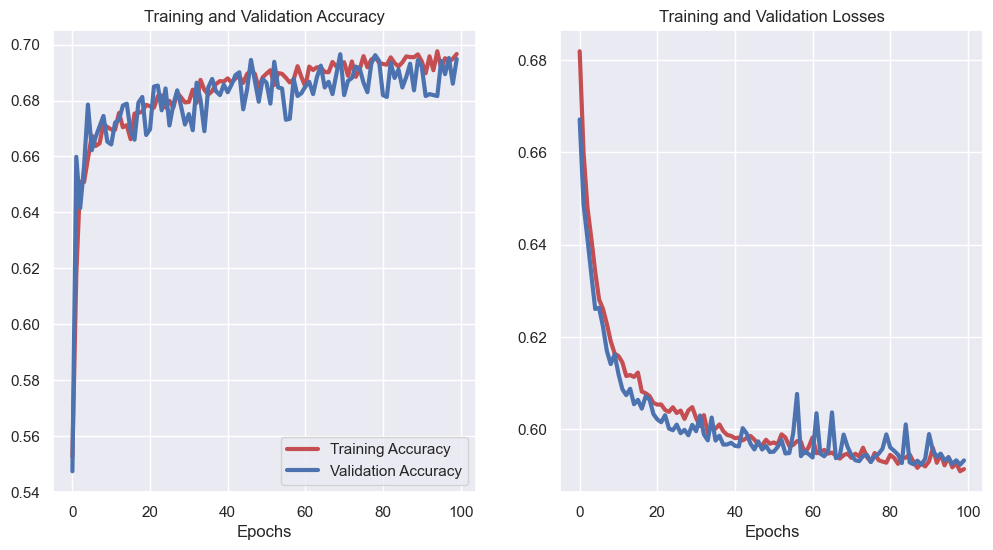

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.697     0.685     0.691     10260
         1.0      0.693     0.704     0.698     10341

    accuracy                          0.695     20601
   macro avg      0.695     0.695     0.695     20601
weighted avg      0.695     0.695     0.695     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.683     0.690     0.687      1466
         1.0      0.689     0.682     0.686      1477

    accuracy                          0.686      2943
   macro avg      0.686     0.686     0.686      2943
weighted avg      0.686     0.686     0.686      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.679     0.672     0.675      1303
         1.0      0.678     0.685     0.681      1314

    accuracy                          0.678      2617
   macro avg      0.678

In [17]:
from sklearn.linear_model import LogisticRegression

logreg_cls =  tf.keras.Sequential([tf.keras.layers.Dense(2, activation = 'sigmoid', input_dim = HEIGHT * WIDTH)])
logreg_cls.compile(optimizer = tf.optimizers.Adam(0.002), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = logreg_cls.fit(x_train.reshape(n_train, -1), 
                        y_train,
                        batch_size = 512,
                        validation_data=[x_val.reshape(n_val, -1), y_val],
                        validation_batch_size=128,
                        epochs = 100,
                        callbacks =  [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
                                     tf.keras.callbacks.ModelCheckpoint(str = 'val_loss', save_best_only = True, save_weights_only = True, filepath= "LR_No_Aug_HSV")],
                        verbose = 1)

logreg_cls.load_weights('LR_No_Aug_HSV')
preds_train = np.argmax(logreg_cls.predict(x_train.reshape(n_train, -1)), axis = 1)
preds_val   = np.argmax(logreg_cls.predict(x_val.reshape(n_val, -1)), axis = 1)
preds_test  = np.argmax(logreg_cls.predict(x_test.reshape(n_test, -1)), axis = 1)

fig, ax = plot_history(history)

fig.savefig(PLOT_SAVE + "logreg_unaug_losscurve_HSV.png", facecolor = 'white')

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

#### Decision Trees

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt_cls =  DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 12, min_samples_split = 2, )
dt_cls.fit(x_train.reshape(n_train, -1), y_train)
preds_train = dt_cls.predict(x_train.reshape(n_train, -1))
preds_val   = dt_cls.predict(x_val.reshape(n_val, -1))
preds_test  = dt_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

# eval = testing_module.ModelEvaluation(y_val, 
#     nb_cls.predict(x_val.reshape(n_val, -1)),
#     model_reference_name = 'Naive Bayes',
#     model_type = 'classification',
#     plot_classification_metric = ['roc_auc']) # if classification
# eval.evaluate(evaluate_save= True, plots_show = True)

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.759     0.838     0.797     10260
         1.0      0.821     0.736     0.776     10341

    accuracy                          0.787     20601
   macro avg      0.790     0.787     0.787     20601
weighted avg      0.790     0.787     0.786     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.669     0.765     0.714      1466
         1.0      0.728     0.625     0.673      1477

    accuracy                          0.695      2943
   macro avg      0.699     0.695     0.693      2943
weighted avg      0.699     0.695     0.693      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.648     0.741     0.691      1303
         1.0      0.700     0.600     0.646      1314

    accuracy                          0.670      2617
   macro avg      0.674

#### XGBoost

In [16]:
from xgboost import XGBClassifier

xgb_cls = XGBClassifier(max_depth = 10, objective = 'reg:logistic',
                            num_parallel_tree = 20, booster = 'gbtree',
                            gamma = 0.5, tree_method = 'gpu_hist', subsample = 0.4, reg_lambda = 1)
setattr(xgb_cls, 'verbosity', 1)
xgb_cls.fit(x_train.reshape(n_train, -1), y_train)
preds_train = xgb_cls.predict(x_train.reshape(n_train, -1))
preds_val   = xgb_cls.predict(x_val.reshape(n_val, -1))
preds_test  = xgb_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))
                  

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.998     0.999     0.999     10260
         1.0      0.999     0.998     0.999     10341

    accuracy                          0.999     20601
   macro avg      0.999     0.999     0.999     20601
weighted avg      0.999     0.999     0.999     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.904     0.954     0.928      1466
         1.0      0.951     0.899     0.924      1477

    accuracy                          0.926      2943
   macro avg      0.927     0.926     0.926      2943
weighted avg      0.928     0.926     0.926      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.920     0.959     0.939      1303
         1.0      0.957     0.918     0.937      1314

    accuracy                          0.938      2617
   macro avg      0.939

#### SVM

In [ ]:
from sklearn.svm import SVC

svm_cls = SVC(kernel = 'poly', degree = 3, gamma = 'auto', max_iter = 250, verbose= True)
svm_cls.fit(x_train.reshape(n_train, -1), y_train)
preds_train = svm_cls.predict(x_train.reshape(n_train, -1))
preds_val   = svm_cls.predict(x_val.reshape(n_val, -1))
preds_test  = svm_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))
                  

[LibSVM]

c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.581     0.102     0.174     10260
         1.0      0.510     0.927     0.658     10341

    accuracy                          0.516     20601
   macro avg      0.545     0.515     0.416     20601
weighted avg      0.545     0.516     0.417     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.585     0.101     0.172      1466
         1.0      0.510     0.929     0.659      1477

    accuracy                          0.516      2943
   macro avg      0.548     0.515     0.415      2943
weighted avg      0.547     0.516     0.416      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.590     0.106     0.180      1303
         1.0      0.511     0.927     0.659      1314

    accuracy                          0.518      2617
   macro avg      0.550

#### CNN Model

Epoch 1/50
81/81 [==============================] - 2s 14ms/step - loss: 0.1845 - accuracy: 0.9211 - val_loss: 0.0389 - val_accuracy: 0.9901
Epoch 2/50
81/81 [==============================] - 1s 12ms/step - loss: 0.0346 - accuracy: 0.9903 - val_loss: 0.0387 - val_accuracy: 0.9888
Epoch 3/50
81/81 [==============================] - 1s 12ms/step - loss: 0.0293 - accuracy: 0.9918 - val_loss: 0.0348 - val_accuracy: 0.9905
Epoch 4/50
81/81 [==============================] - 1s 12ms/step - loss: 0.0276 - accuracy: 0.9926 - val_loss: 0.0237 - val_accuracy: 0.9929
Epoch 5/50
81/81 [==============================] - 1s 12ms/step - loss: 0.0260 - accuracy: 0.9933 - val_loss: 0.0264 - val_accuracy: 0.9915
Epoch 6/50
81/81 [==============================] - 1s 12ms/step - loss: 0.0229 - accuracy: 0.9936 - val_loss: 0.0241 - val_accuracy: 0.9925
Epoch 7/50
81/81 [==============================] - 1s 11ms/step - loss: 0.0219 - accuracy: 0.9940 - val_loss: 0.0288 - val_accuracy: 0.9918
Epoch 8/50
81

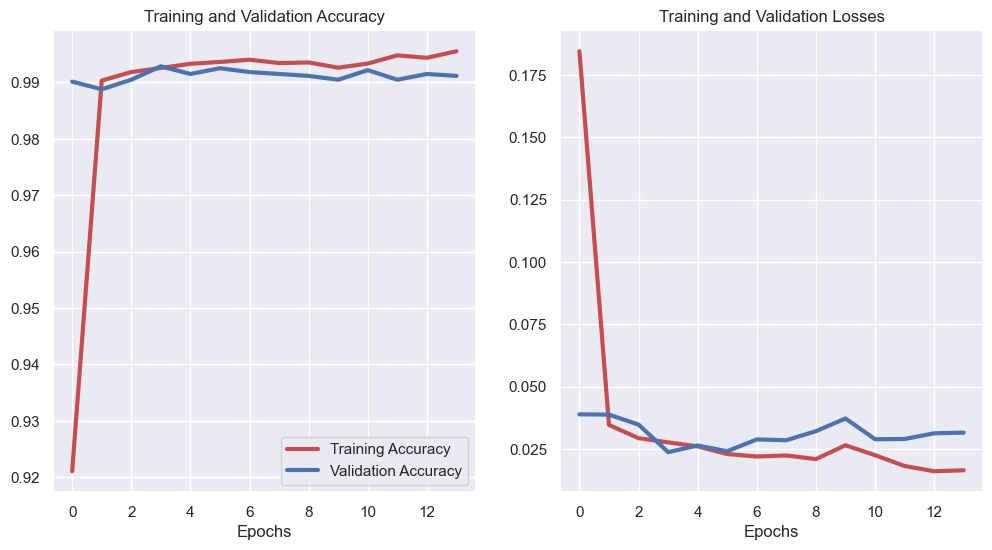

82/82 [==============================] - 0s 1ms/step
Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.995     0.995     0.995     10260
         1.0      0.995     0.995     0.995     10341

    accuracy                          0.995     20601
   macro avg      0.995     0.995     0.995     20601
weighted avg      0.995     0.995     0.995     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.993     0.992     0.993      1466
         1.0      0.993     0.993     0.993      1477

    accuracy                          0.993      2943
   macro avg      0.993     0.993     0.993      2943
weighted avg      0.993     0.993     0.993      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.996     0.993     0.995      1303
         1.0      0.993     0.996     0.995      1314

    accuracy            

In [46]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu', input_shape = x_train[0].shape),
    tf.keras.layers.MaxPool2D((3,3), padding = 'same'),

    tf.keras.layers.UpSampling2D((4,4)),

    tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D((3,3), padding = 'same'),

    tf.keras.layers.Conv2D(32, (2,2), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D((2,2), padding = 'same'),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation = 'sigmoid')
])

cnn.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.003),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = cnn.fit(
            x_train, y_train, batch_size = 256,
            epochs = 50,
            validation_data = [x_val, y_val],
            validation_batch_size = 256,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
                         tf.keras.callbacks.ModelCheckpoint(str = 'val_loss', save_best_only = True, save_weights_only = True, filepath= "CNN_No_Aug_HSV")]
        )


cnn.load_weights('CNN_No_Aug_HSV')
fig, ax = plot_history(history)

fig.savefig(PLOT_SAVE + "CNN_unaug_losscurve_HSV.png", facecolor = 'white')
preds_train = np.argmax(cnn.predict(x_train), axis = 1)
preds_val   = np.argmax(cnn.predict(x_val), axis = 1)
preds_test  = np.argmax(cnn.predict(x_test), axis = 1)

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))